In [183]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
from google.colab import files
files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention (1).csv


{'online_shoppers_intention.csv': b'Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue\r\n0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,2,2.666666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE\r\n0,0,0,0,19,154.2166667,0.015789474,0.024561404,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,1,0,0.2,0.2,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE\r\n1,0,0,0,0,0,0.2,0.2,0,0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE\r\n0,0,0,0,2,37,0,0.1,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE\r\n0,0,0,0,3,738,0,0.022222222,0,0.4,Feb,2,4,1,2,Returning_V

In [185]:
#importing data
shopdata=pd.read_csv('online_shoppers_intention.csv')

In [186]:
shopdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [187]:
#checking what are the types includes in the data set
shopdata.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [188]:
#Checking the columns which are included in the dataset
shopdata.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [189]:
#for some statstical analysis
shopdata.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [190]:
#checking the missing values in the data
shopdata.isnull().sum().sort_values(ascending=False)

Revenue                    0
Weekend                    0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Administrative             0
dtype: int64

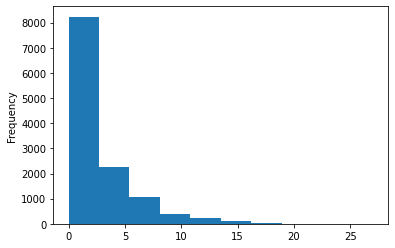

In [191]:
#plotting histogram
shopdata.Administrative.plot(kind='hist')

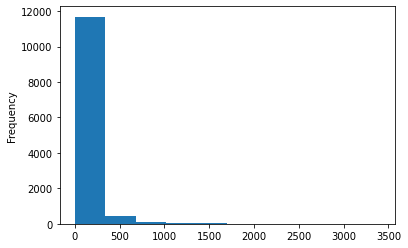

In [192]:
shopdata.Administrative_Duration.plot(kind='hist')

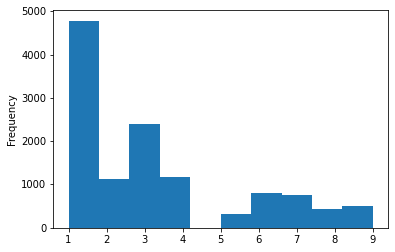

In [193]:
shopdata.Region.plot(kind='hist')

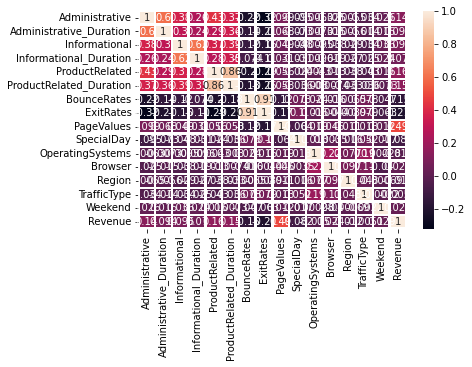

In [194]:
sns.heatmap(shopdata.corr(),annot=True,linewidth=1.5)

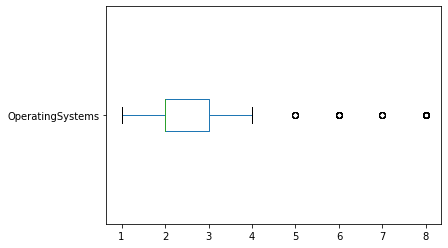

In [195]:
shopdata.OperatingSystems.plot(kind='box',vert=False)

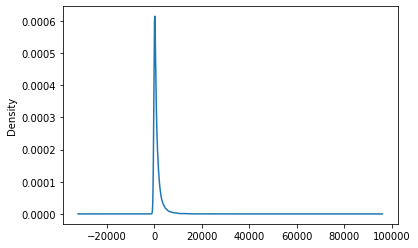

In [196]:
shopdata.ProductRelated_Duration.plot(kind='density')

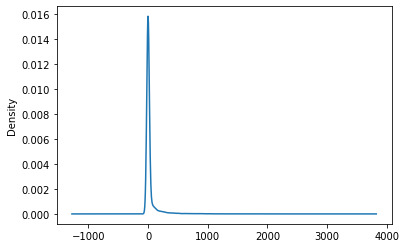

In [197]:
shopdata.Informational_Duration.plot(kind='density')

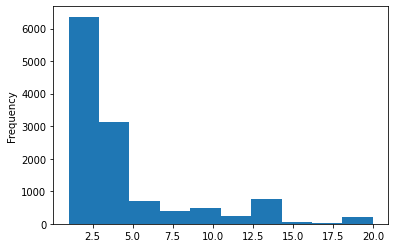

In [198]:
shopdata.TrafficType.plot(kind='hist')

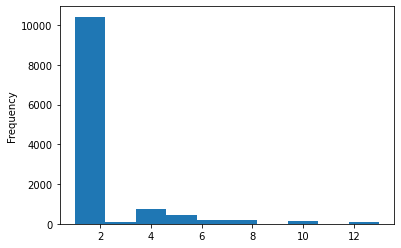

In [199]:
shopdata.Browser.plot(kind='hist')

In [200]:
#checking the columns
shopdata.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

T-TEST

In [201]:
from scipy.stats import ttest_ind

In [144]:
shopdata.Weekend.value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [145]:
shopdata.Weekend.groupby(shopdata.Revenue).mean()

Revenue
0    0.227308
1    0.261530
Name: Weekend, dtype: float64

In [146]:
no=shopdata[shopdata.Revenue==0]
yes=shopdata[shopdata.Revenue==1]

In [147]:
ttest_ind(no.Weekend,yes.Weekend,equal_var=False)
# SINCE pvalue=0.0016585421 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

Ttest_indResult(statistic=-3.1487315625453247, pvalue=0.001658542151602163)

**F-ANOVA**

In [173]:
from scipy.stats import f_oneway

In [218]:
shopdata.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [222]:
shopdata.Administrative.groupby(shopdata.VisitorType).mean()

VisitorType
New_Visitor          2.551948
Other                1.470588
Returning_Visitor    2.283954
Name: Administrative, dtype: float64

In [231]:
A=shopdata[shopdata.VisitorType=='New_Visitor']
B=shopdata[shopdata.VisitorType=='Other']
C=shopdata[shopdata.VisitorType=='Returning_Visitor']

In [232]:
f_oneway(A.Administrative,B.Administrative,C.Administrative)
## SINCE pvalue=0.0005420192534918692 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

F_onewayResult(statistic=7.52479867892518, pvalue=0.0005420192534918692)

In [233]:
shopdata.OperatingSystems.groupby(shopdata.VisitorType).mean()

VisitorType
New_Visitor          2.027745
Other                5.823529
Returning_Visitor    2.109658
Name: OperatingSystems, dtype: float64

In [234]:
A=shopdata[shopdata.VisitorType=='New_Visitor']
B=shopdata[shopdata.VisitorType=='Other']
C=shopdata[shopdata.VisitorType=='Returning_Visitor']

In [235]:
f_oneway(A.OperatingSystems,B.OperatingSystems,C.OperatingSystems)
## SINCE pvalue=0.0 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

F_onewayResult(statistic=803.7430549279885, pvalue=0.0)

**chi-square-Test**

In [226]:
from scipy.stats import chi2_contingency

In [228]:
chi2_contingency(pd.crosstab(shopdata.Revenue,shopdata.VisitorType))
## SINCE pvalue= 4.269904152293867e-30 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and
# Visitor type

(135.2519228192047,
 4.269904152293867e-30,
 2,
 array([[1431.86277372,   71.84671533, 8918.29051095],
        [ 262.13722628,   13.15328467, 1632.70948905]]))

In [230]:
chi2_contingency(pd.crosstab(shopdata.Revenue,shopdata.Weekend))
## SINCE pvalue= 0.00126632 IS less THAN 0.05,  REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN revenue and weekend

(10.390978319534856,
 0.0012663251061221968,
 1,
 array([[7997.80729927, 2424.19270073],
        [1464.19270073,  443.80729927]]))

**Label encoding**


In [24]:
shopdata['Revenue'] = shopdata['Revenue'].astype(int)
shopdata['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [25]:
shopdata['Weekend'] = shopdata['Weekend'].astype(int)
shopdata['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

Dummy variables

In [26]:
shopdata = pd.get_dummies(data = shopdata, columns=['Month', 'VisitorType'], drop_first=True)
shopdata.shape

(12330, 27)

In [27]:
shopdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1


In [28]:
# Split Data into DependentVariable(y) & Independent Variables (X)
y=shopdata.Revenue
X=shopdata.drop('Revenue',axis=1)

**LOGISTIC REGRESSION**

In [29]:
from sklearn.linear_model import LogisticRegression

In [258]:
#short name and giving iterations
logreg=LogisticRegression(max_iter=10000)

In [31]:
#model building
logregmodel=logreg.fit(X,y)

In [32]:
#R-Square
logregmodel.score(X,y)

0.8834549878345499

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
#cross validation and mean
np.mean(cross_val_score(logreg,X,y,cv=5))

0.8802108678021086

In [35]:
#predicting the data
logitpredict=logregmodel.predict(X)

In [36]:
#Confusion Matrix
pd.crosstab(y, logitpredict)

col_0,0,1
Revenue,,
0,10174,248
1,1189,719


In [37]:
#classification report
from sklearn.metrics import classification_report

In [38]:
#print the classification report of the model
print(classification_report( y, logitpredict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93     10422
           1       0.74      0.38      0.50      1908

    accuracy                           0.88     12330
   macro avg       0.82      0.68      0.72     12330
weighted avg       0.87      0.88      0.87     12330



Clearly there is an **imbalance** in the dataset based on Recall, F1-Score , Precision

***IMBALANCE DATASET - SMOTE ***

In [41]:
#Importing the smote algorithm to  balance the dataset
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [42]:
smote=SMOTE()

In [43]:
X_smote,y_smote=smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print(X_smote.shape)

(20844, 26)


In [259]:
logit_smote=logreg.fit(X_smote,y_smote)

In [260]:
logit_smote.score(X_smote,y_smote)

0.8356841297255805

In [261]:
#CROSS VALIDATION AND MEAN 
np.mean(cross_val_score(logreg,X_smote,y_smote,cv=5))

0.7112366019366967

In [46]:
logit_smote_predict=logit_smote.predict(X_smote)

In [47]:
#classification report after imbalancing the dataset
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85     10422
           1       0.88      0.78      0.83     10422

    accuracy                           0.84     20844
   macro avg       0.84      0.84      0.84     20844
weighted avg       0.84      0.84      0.84     20844



In [109]:
from sklearn.metrics import plot_roc_curve

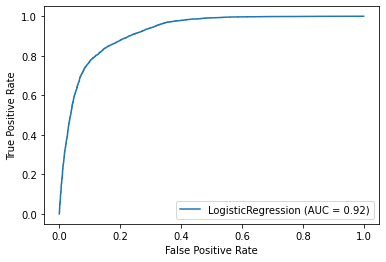

In [110]:
plot_roc_curve(logreg,X_smote,y_smote)

**DECISION TREE CLASSIFIER**

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
#SHORT NAME
tree=DecisionTreeClassifier(max_depth=3)

In [50]:
#MODEL BUILDING
treemodel=tree.fit(X_smote,y_smote)

In [51]:
#R-SQUARE 
treemodel.score(X_smote,y_smote)

0.9107656879677605

In [52]:
#CROSS VALIDATION AND MEAN 
np.mean(cross_val_score(tree,X_smote,y_smote,cv=5))

0.8941194811903415

In [53]:
#PREDICTING THE MODEL 
treepredict=treemodel.predict(X_smote)

In [54]:
#PRINTING THE CLASSIFICATION REPORT FOR ANALYSIS
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10422
           1       0.91      0.92      0.91     10422

    accuracy                           0.91     20844
   macro avg       0.91      0.91      0.91     20844
weighted avg       0.91      0.91      0.91     20844



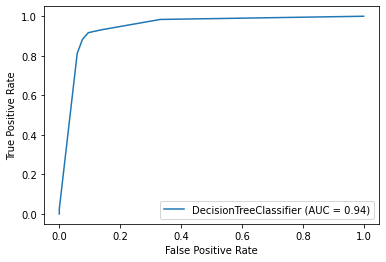

In [55]:
#Plotting the roc curve to find true positive rate and false positive rate for a predictive model
plot_roc_curve(tree,X_smote,y_smote)

In [56]:
#Confusion Matrix
pd.crosstab(y_smote,treepredict)

col_0,0,1
row_0,,
0,9431,991
1,869,9553


**RANDOM FOREST CLASSIFIER**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
#short name and giving estimators
RF=RandomForestClassifier(n_estimators=1000)

In [59]:
#model building
RFmodel=RF.fit(X_smote,y_smote)

In [60]:
#r-square
RFmodel.score(X_smote,y_smote)

1.0

In [61]:
#cross validation and the mean
np.mean(cross_val_score(RF,X_smote,y_smote,cv=5))

0.9042424457275136

In [62]:
#predicting the data
RFpredict=RFmodel.predict(X_smote)

In [63]:
#classification report  for better analysis
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10422
           1       1.00      1.00      1.00     10422

    accuracy                           1.00     20844
   macro avg       1.00      1.00      1.00     20844
weighted avg       1.00      1.00      1.00     20844



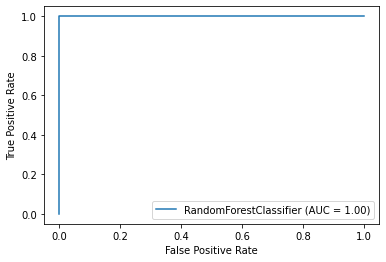

In [64]:
#plotting ROC curve
plot_roc_curve(RF,X_smote,y_smote)

In [65]:
#Confusion Matrix
pd.crosstab(y_smote,RFpredict)

col_0,0,1
row_0,,
0,10422,0
1,0,10422


 **GRADIENT BOOSTING CLASSIFIER**

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
#short name and giving estimators 
gbm=GradientBoostingClassifier(n_estimators=2000)

In [68]:
#model building
gbmmodel=gbm.fit(X_smote,y_smote)

In [69]:
# R-Square
gbmmodel.score(X_smote,y_smote)

0.9906927653041643

In [70]:
#crossvalidation and mean
np.mean(cross_val_score(gbm,X_smote,y_smote,cv=5))

0.8716686409929058

In [71]:
#Predicting the model
gbmpredict=gbmmodel.predict(X_smote)

In [72]:
#Classification Report
print(classification_report(y_smote,gbmpredict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10422
           1       1.00      0.99      0.99     10422

    accuracy                           0.99     20844
   macro avg       0.99      0.99      0.99     20844
weighted avg       0.99      0.99      0.99     20844



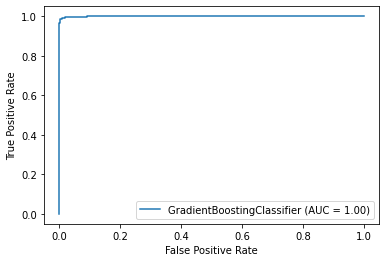

In [73]:
#plotting ROC curve
plot_roc_curve(gbm,X_smote,y_smote)

In [74]:
#Confusion Matrix
pd.crosstab(y_smote,gbmpredict)

col_0,0,1
row_0,,
0,10375,47
1,147,10275


**NAIVE BAYES**

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
#short name 
NB=GaussianNB()

In [77]:
#model building
NBmodel=NB.fit(X_smote,y_smote)

In [78]:
# R-Square
NBmodel.score(X_smote,y_smote)

0.7694300518134715

In [79]:
#cross validation score and the mean
np.mean(cross_val_score(NB,X_smote,y_smote,cv=5))

0.5525305253242445

In [80]:
#Predicting the model
NBpredict=NBmodel.predict(X_smote)

In [81]:
#Classification report for analysis
print(classification_report(y_smote,NBpredict))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     10422
           1       0.73      0.85      0.79     10422

    accuracy                           0.77     20844
   macro avg       0.78      0.77      0.77     20844
weighted avg       0.78      0.77      0.77     20844



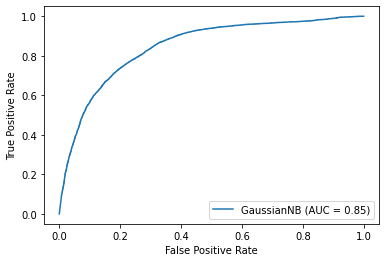

In [82]:
#Plotting roc curve
plot_roc_curve(NB,X_smote,y_smote)

In [83]:
#Confusion Matrix
pd.crosstab(y_smote,NBpredict)

col_0,0,1
row_0,,
0,7159,3263
1,1543,8879


**KNEIGHBORS CLASSIFIER**

In [84]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [85]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [86]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

In [87]:
ss=StandardScaler()

In [88]:
X_ss=ss.fit_transform(X_smote)

In [89]:
#parameters
param={'n_neighbors':range(1,50),'weights':['uniform','distance']}

In [90]:
#short name
grid=GridSearchCV(KNeighborsClassifier(),param)

In [91]:
#model building
gridmodel=grid.fit(X_smote,y_smote)

In [92]:
#best parameters
gridmodel.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [111]:
#short name
kn=KNeighborsClassifier(n_neighbors=10,weights='uniform')

In [112]:
#model building
knmodel=kn.fit(X_ss,y_smote)

In [113]:
#R-square
knmodel.score(X_ss,y_smote)

0.8996353866820188

In [114]:
#Pedicting the model
knpredict=knmodel.predict(X_ss)

In [115]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,knpredict)

col_0,0,1
row_0,,
0,9454,968
1,1124,9298


In [116]:
#cross validation and mean
np.mean(cross_val_score(kn,X_ss,y_smote,cv=5))

0.7333068683072986

In [117]:
#classification report for analysis
print(classification_report(y_smote,knpredict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10422
           1       0.91      0.89      0.90     10422

    accuracy                           0.90     20844
   macro avg       0.90      0.90      0.90     20844
weighted avg       0.90      0.90      0.90     20844



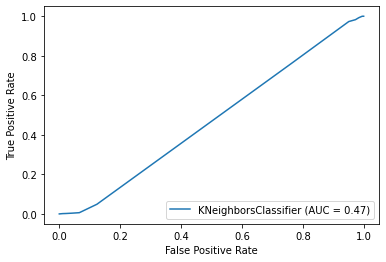

In [236]:
#Plotting roc curve
plot_roc_curve(kn,X_smote,y_smote)

**Multi-layer Perception Classifier**

In [246]:
from sklearn.neural_network import MLPClassifier

In [248]:
mlp= MLPClassifier()

In [250]:
mlp_model=mlp.fit(X_smote,y_smote)

In [251]:
mlp.score(X_smote,y_smote)

0.874496257915947

In [252]:
#cross validation and mean
np.mean(cross_val_score(mlp,X_smote,y_smote,cv=5))

0.7258223801580904

In [253]:
#Pedicting the model
mlppredict=mlp_model.predict(X_smote)

In [254]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,mlppredict)

col_0,0,1
row_0,,
0,8790,1632
1,984,9438


In [255]:
#classification report for analysis
print(classification_report(y_smote,mlppredict))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     10422
           1       0.85      0.91      0.88     10422

    accuracy                           0.87     20844
   macro avg       0.88      0.87      0.87     20844
weighted avg       0.88      0.87      0.87     20844



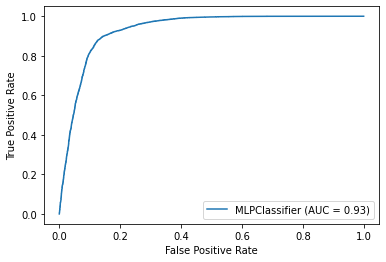

In [256]:
#Plotting roc curve
plot_roc_curve(mlp,X_smote,y_smote)

**SUPPORT VECTOR MACHINES**

In [101]:
#support vector machine
from sklearn.svm import SVC

In [102]:
#short name
svc=SVC()

In [103]:
#model building
svcmodel=svc.fit(X_smote,y_smote)

In [104]:
#R-square
svcmodel.score(X_smote,y_smote)

0.7407407407407407

In [105]:
svcpredict=svcmodel.predict(X_smote)

In [106]:
#cross tabulation of y and predicted variable
pd.crosstab(y_smote,svcpredict)

col_0,0,1
row_0,,
0,7801,2621
1,2783,7639


In [107]:
#cross validation score and mean
np.mean(cross_val_score(svc,X_smote,y_smote,cv=5))

0.7300412076338978

In [108]:
#classification report for the model
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     10422
           1       0.74      0.73      0.74     10422

    accuracy                           0.74     20844
   macro avg       0.74      0.74      0.74     20844
weighted avg       0.74      0.74      0.74     20844



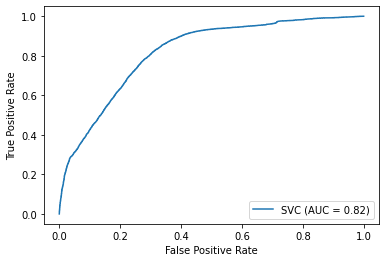

In [237]:
#Plotting roc curve
plot_roc_curve(svc,X_smote,y_smote)

The Accuracy for Logistic Regression =  **71% **  and **AUC =  0.92**

The Accuracy for Decision Tree Classifier=   **89% ** and **AUC = 0.94**

The Accuracy for Random Forest Classifier = **90%**   and **AUC = 1.0**

The Accuracy for Gradient Boosting Classifier =  **87%** and **AUC = 1.0** 

The Accuracy for Gaussian Naive Bayes      =   **55%**  and **AUC = 0.85**

The Accuracy for Multi Layer Perception    =   ** 72%**  and **AUC = 0.93**

The Accuracy for  KNeighbours Classifier  =     **72% ** and **AUC = 0.47**

The Accuracy for  Support Vector Machines =   **73%**  and **AUC = 0.82**


# **BASED ON THE ACCURACY WE CAN SAY THAT THE BEST MODEL IS *RANDOM FOREST CLASSIFIER* FOR THIS DATASET**

**M.SAI PAVAN**

**PGA16**